
## Business Goal
* To  build Regression models to predict the prices of used cars based on Independent variables and Finding useful Insights and patterns


## Steps
1.   **Data Collection**
2.   **Data Cleaning/Pre Processing**
3.   **EDA**
4.   **Model Building**
5.   **Deployment**

## Libraries

In [1]:
## Data Manipulation
import pandas as pd
## Arithmetic
import numpy as np
## Visulaisations
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
## used to show all columns and rowsif required
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Connecting to shared drive
from google.colab import drive
drive.mount('/content/drive')

In [3]:
## Connecting to shared drive
from google.colab import drive
drive.mount('/content/drive')

In [4]:
## link to the data in google drive
link = 'https://drive.google.com/file/d/1r7-wzXC2tI2kacS2KKUV11VqNtiAY7I6/view?usp=share_link'

## split to get the id part of the file
id = link.split("/")[-2]
 
## create the file in pydrive, then get the content from it
downloaded = drive.CreateFile({'id':id})

downloaded.GetContentFile('vehicles.csv')

In [5]:
## import the file into a dataframe 
## Reading data from local pc
d1 = pd.read_csv(r"C:\Users\letss\Desktop\UMBC CLASSES\Spring2023\Capstone\Dataset\vehicles.csv")

In [6]:
## Top 5 rows
d1.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [7]:
## Number of (Rows,Columns)
d1.shape

(426880, 26)

In [8]:
## Random 3 rows to get overview
d1.sample(3)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
245856,7303949637,https://lincoln.craigslist.org/ctd/d/council-b...,lincoln,https://lincoln.craigslist.org,5500,2008.0,ford,fusion se,good,4 cylinders,gas,128826.0,clean,automatic,3FAHP07Z28R147201,fwd,NaN,sedan,blue,https://images.craigslist.org/00N0N_fiv8udoW1a...,"2008 Ford FUSION SE - $5,500 Year: 2008 Make:...",NaN,ne,41.228180,-95.860830,2021-04-08T19:08:57-0500
267238,7311026631,https://buffalo.craigslist.org/ctd/d/victor-20...,buffalo,https://buffalo.craigslist.org,204,2019.0,mitsubishi,mirage g4 es,good,NaN,other,13913.0,clean,other,ML32F3FJXKHF15557,fwd,NaN,hatchback,blue,https://images.craigslist.org/00I0I_j0R94jyTjs...,Why Buy From Auction Direct Rochester?At Aucti...,NaN,ny,42.976937,-77.387044,2021-04-22T16:10:40-0400
33884,7316399778,https://losangeles.craigslist.org/lac/ctd/d/lo...,los angeles,https://losangeles.craigslist.org,15900,2016.0,cadillac,ats sedan,excellent,4 cylinders,gas,33608.0,clean,automatic,1G6AB5SA3G0138825,rwd,mid-size,sedan,white,https://images.craigslist.org/00j0j_byQW14HG39...,2016 *** Cadillac ATS Sedan 4dr Sdn 2.5L Luxur...,NaN,ca,34.049300,-118.291700,2021-05-03T13:12:59-0700


In [9]:
## It helps us to get the data types of Columns
## Also tell us non missing values in each Column
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [10]:
## 5 Point Summary Stats 
d1.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


## Data Cleaning and Preprocessing 

* Removing Redundant Columns
* Handling Missing Values
* Handling Outliers
* Scaling the Data

**Unique Values for each Column**

In [11]:
## Checking Unique Values for Each Column
unique_values = pd.DataFrame(d1.nunique().reset_index())
unique_values.columns = ['Feature','Count']
unique_values

,Feature,Count
0,id,426880
1,url,426880
2,region,404
3,region_url,413
4,price,15655
5,year,114
6,manufacturer,42
7,model,29667
8,condition,6
9,cylinders,8


**Treating Missing Values**

Missing Values Percentages for each column greater than 0

In [12]:
## Checking Missing Values Percentages for each column
## If missing values are Absent, it will not show that Columns
nullvalues = pd.DataFrame(d1.isnull().sum()).reset_index()
nullvalues.columns = ['Feature', 'Missing_Percent(%)']
nullvalues['Missing_Percent(%)'] = nullvalues['Missing_Percent(%)'].apply(lambda x: x / d1.shape[0] * 100)
nullvalues.loc[nullvalues['Missing_Percent(%)']>0,:].sort_values('Missing_Percent(%)', ascending=False)

,Feature,Missing_Percent(%)
21,county,100.000000
16,size,71.767476
9,cylinders,41.622470
8,condition,40.785232
14,VIN,37.725356
15,drive,30.586347
18,paint_color,30.501078
17,type,21.752717
6,manufacturer,4.133714
12,title_status,1.930753


**NOTE** :
* We can see that many Columns has Missing Values. 
* 'county' column has 100 % Null Values. So We need to drop this column.
* 'size', 'cylinders', 'condition', 'VIN', 'drive', 'paint_color' has more than 30% Null values Respectively. But dropping Entirely will not be efficient way, So we will perform *Imputation* on these columns and the other columns as well.
--------------------------------------------------------------
* We have to Consider many scenarios for handling of Missing Values.
* Dropping Some columns which have more number of Null Values
* Perfrom Imputation techniques (Mean, Median, Mode,ffill, bfill) on some features.


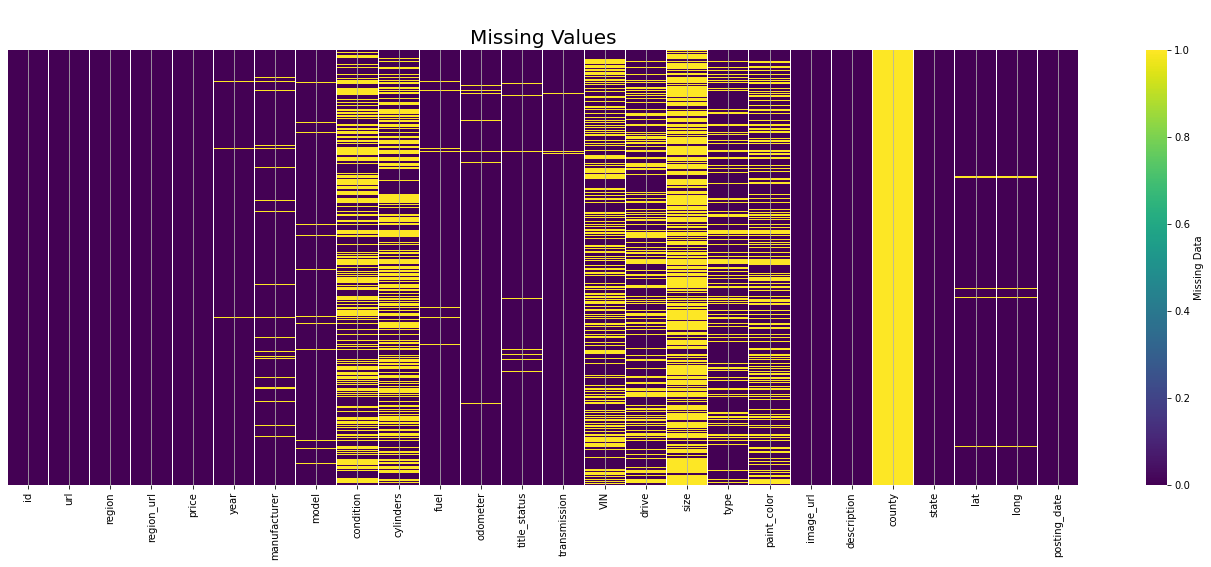

In [13]:
## Missing Values Visualization
## Some columns are having missing values
## color with purple are having least numbr of null values and yellow color with more null values
plt.figure(figsize=(24,8))
sns.heatmap(d1.isnull(), yticklabels=False,cbar_kws={'label': 'Missing Data'},cmap="viridis")
plt.title('\nMissing Values', fontsize=20);
plt.grid()
plt.show()

Duplicate Records

In [14]:
## We have to check the duplicate values before going further with the dataset.
print(f'There are {d1.duplicated().sum()} duplicates in the {d1.shape[0]} rows')

There are 0 duplicates in the 426880 rows


Dropping Redundant Columns and keeping only useful Features




In [ ]:
## Dropping Columns which are having More number of Missing Values
## County would have been effecctive for our Analysis, But this Column is having all Null Values, So Dropping
## VIN is also having more Null values

d1.drop(['county','VIN','id','region','lat','long'], axis =1, inplace = True)

In [16]:
## After thorough research by considering various conditions and feature importance, we removed any redundant columns 
## and selected the most important columns Only.

d1 = d1[['price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color','state']]

In [18]:
## After Dropping Redundant Cols,new shape of data frame
d1.shape

(426880, 15)

In [19]:
# Storing column names in a list for later use
cols = d1.columns
# columns with numerical data types
numeric_c = d1.select_dtypes(include=['int64', 'float64']).columns
#  columns with string data types
char_c = d1.select_dtypes(include = ['object','bool']).columns

In [20]:
numeric_c

Index(['price', 'year', 'odometer'], dtype='object')

In [21]:
char_c

Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
       'state'],
      dtype='object')

* Now we still have Missing Values in the Data Set, So we need to handle Accordingly

**Imputation**

Handling Categorical Columns, Missing values are filled with mode and other methods(ffill, bfill)


In [22]:
## Imputation for Categorical Columns
def fill_missing_values(df, columns_list):
    for col in columns_list:
        df[col].fillna(df[col].mode()[0], inplace=True)
        
##  function Call
column_list = ['year', 'condition','title_status', 'type',
                'manufacturer','drive', 'transmission',  'size']

fill_missing_values(d1, column_list)

In [23]:
## Since gas remains the most widely used fuel for the majority of cars, fill NAn with gas
d1['fuel'].fillna('gas',inplace = True) 

In [24]:
d1['model'] = d1['model'].fillna(method='bfill') 

In [25]:
## Since statring 25 values were nUll, ffill wasn't effective, So chosen bfill
d1['paint_color'] = d1['paint_color'].fillna(method='bfill').fillna(method='ffill')

In [26]:
## Since there were 3 categories which were almost in sam %, so gone with the bbfill and ffill
d1['cylinders'] = d1['cylinders'].fillna(method='bfill').fillna(method='ffill')

In [27]:
d1.groupby('condition')['odometer'].aggregate(['mean'])

,mean
condition,
excellent,106133.762636
fair,225374.339784
good,92633.941756
like new,92712.489942
new,45349.469685
salvage,258761.638935


Handling Numeric Missing Columns

In [28]:
## First Grouped based on condition types and then calculated the odometer Average.
## Using those avergae values filled missing values for particular Category
d1['odometer'] = d1['odometer'].fillna(d1.groupby('condition')['odometer'].transform('mean'))

After Handling Missing Values

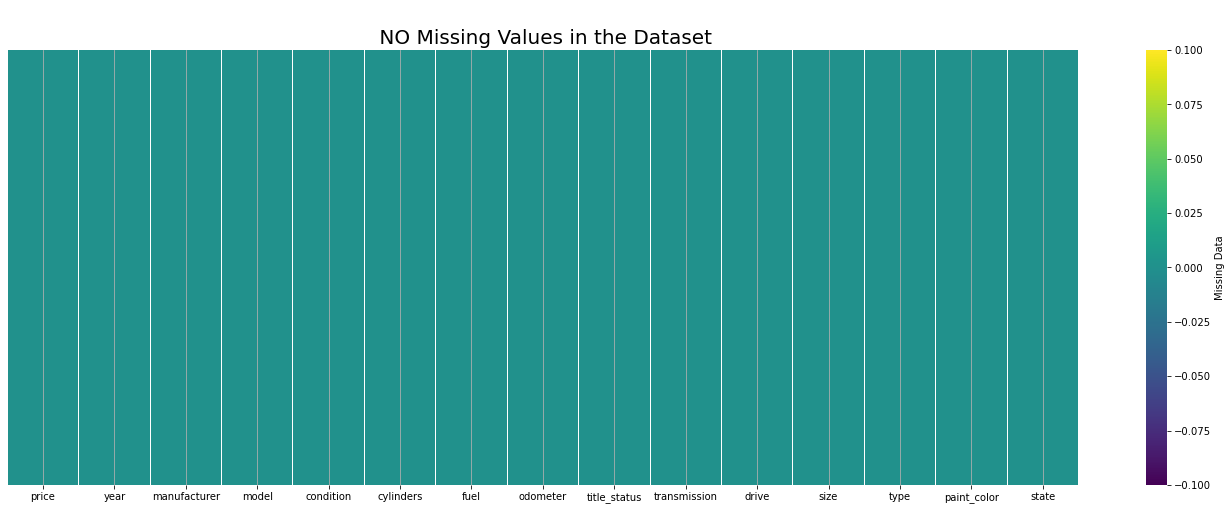

In [29]:
## No Missing Values Visualization
plt.figure(figsize=(24,8))
sns.heatmap(d1.isnull(), yticklabels=False,cbar_kws={'label': 'Missing Data'},cmap="viridis")
plt.title('\n NO Missing Values in the Dataset', fontsize=20);
plt.grid()
plt.show()

## EDA

### States
* California is Leading in the USED car market. After research I have found out the reasons behind it. They are 


1.   Large population : California is the most populous state in the United States, with over 39 million people. With such a large population, the demand for cars is high, and many people turn to the used/pre-owned car market as a more affordable option.

2.   High cost of living : California has a relatively high cost of living compared to many other states. As a result, many people in the state may not be able to afford new cars and turn to the used/pre-owned car market instead.

3.   Diverse economy:  California has a diverse economy with many different industries, including technology, entertainment, and agriculture. This means that there are many different types of people living in the state with different transportation needs, and the used/pre-owned car market can be a good option for those who need a car but may not be able to afford a new one.

4.   Mild climate:  California has a mild climate, which means that cars tend to last longer and experience less wear and tear compared to other parts of the country with harsher weather conditions. This can make the used/pre-owned car market in California more attractive to buyers since they can find cars that are in better condition.



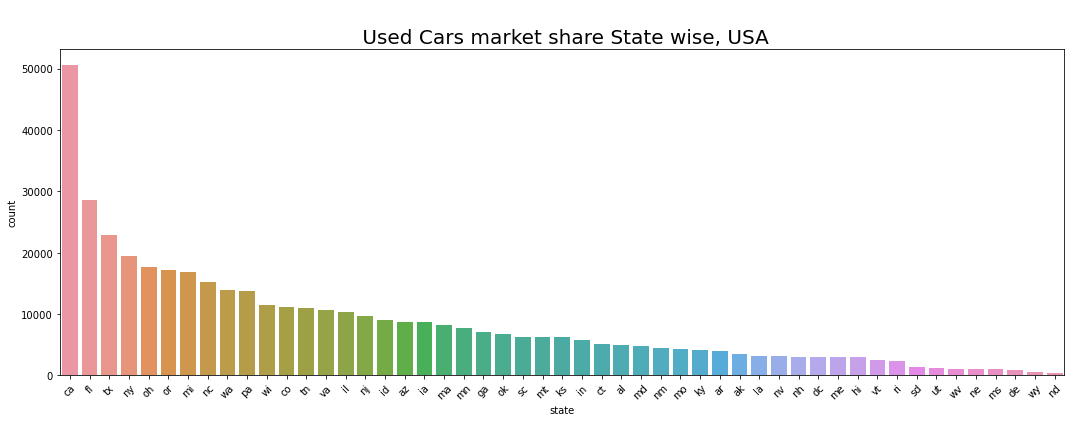

In [30]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data=d1,x='state',order = d1['state'].value_counts().index.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('\n Used Cars market share State wise, USA', fontsize=20);
plt.show()

### Different Manufacturers:
*  It is evident from the below graph that FORD Cars are more in number followed by Chevrolet, Toyota and Landrover, Morgn being least.
* The rest of all other car manufacturers have approximately equal share

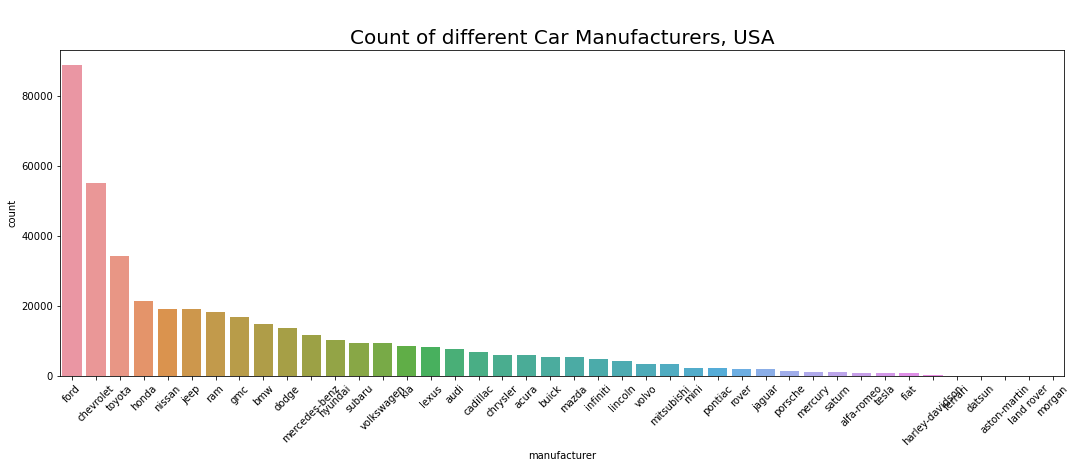

In [31]:
1## Visualizing the different Car manufacturers
plt.figure(figsize=(18,6))
ax = sns.countplot(data=d1,x='manufacturer',order = d1['manufacturer'].value_counts().index.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('\nCount of different Car Manufacturers, USA', fontsize=20);
plt.show()

### Car Year make
* Cars made in 2017 and 2018 are in high numbers on the website for sale.
* We can notice that the old cars are very less in the Craiglist postings, as the people are not interested in very old cars.


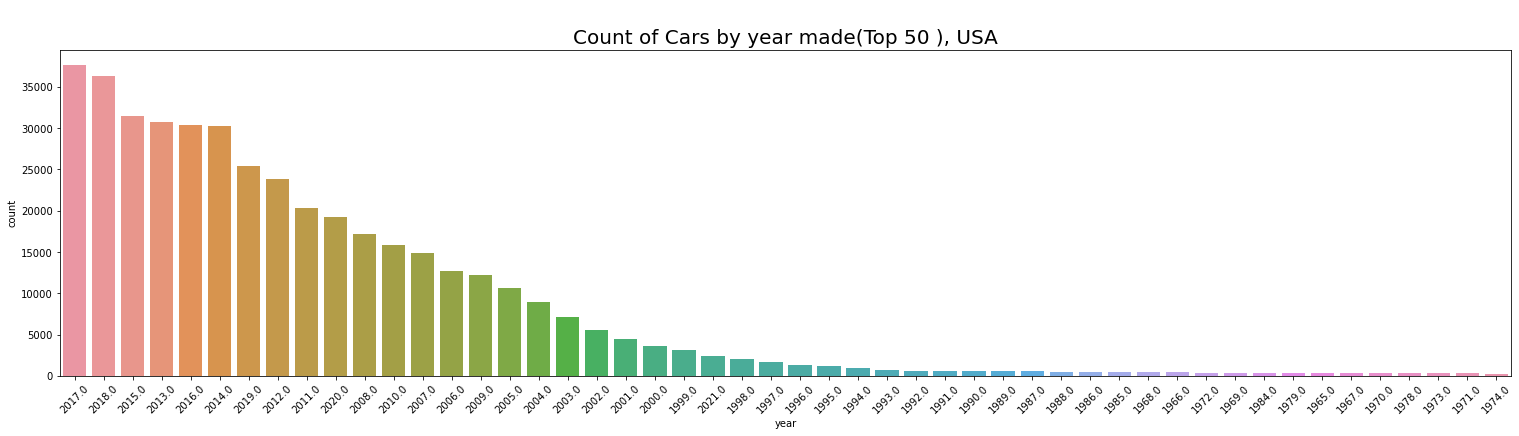

In [32]:
plt.figure(figsize=(26,6))
ax = sns.countplot(data=d1,x='year',order = d1['year'].value_counts().index.values[:50])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('\nCount of Cars by year made(Top 50 ), USA', fontsize=20);
plt.show()

.

### Fuel Type 
* Gas is the Common fuel type used in Cars and electric being the Least
* From third graph, Diesel type cars are most Expensive in price

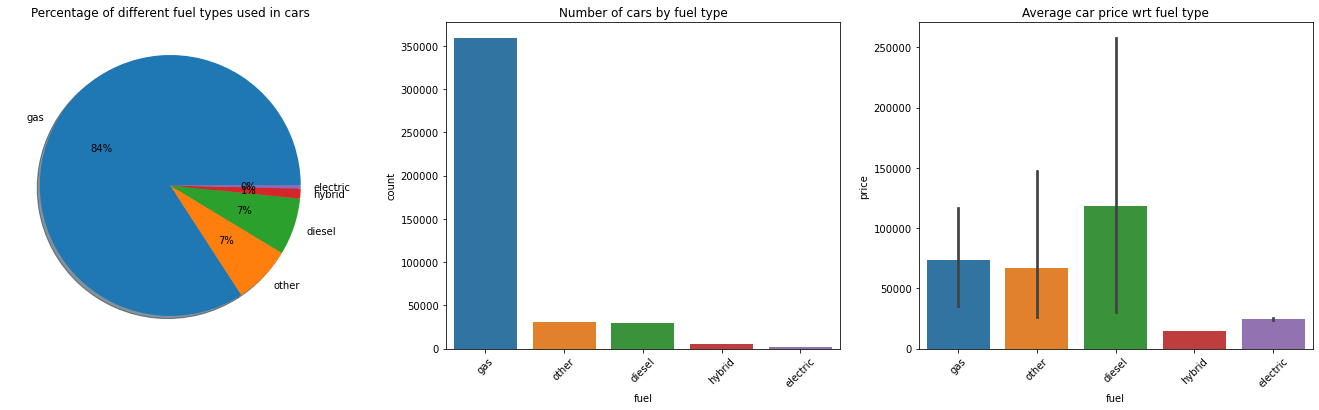

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

ax[0].pie(d1['fuel'].value_counts().values, autopct='%1.0f%%', shadow=True, labels=d1['fuel'].value_counts().index)
ax[0].set_title('Percentage of different fuel types used in cars')

sns.countplot('fuel', data=d1, order=d1['fuel'].value_counts().index, ax=ax[1])
ax[1].set_title('Number of cars by fuel type')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

sns.barplot(x='fuel', y='price', data=d1, ax=ax[2])
ax[2].set_title('Average car price wrt fuel type')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)

plt.show()

### drive ?
* Its interesting that majority of the cars in the data set are of Four-wheel Drive (4WD).
* 4WD cars are most Expensive in price

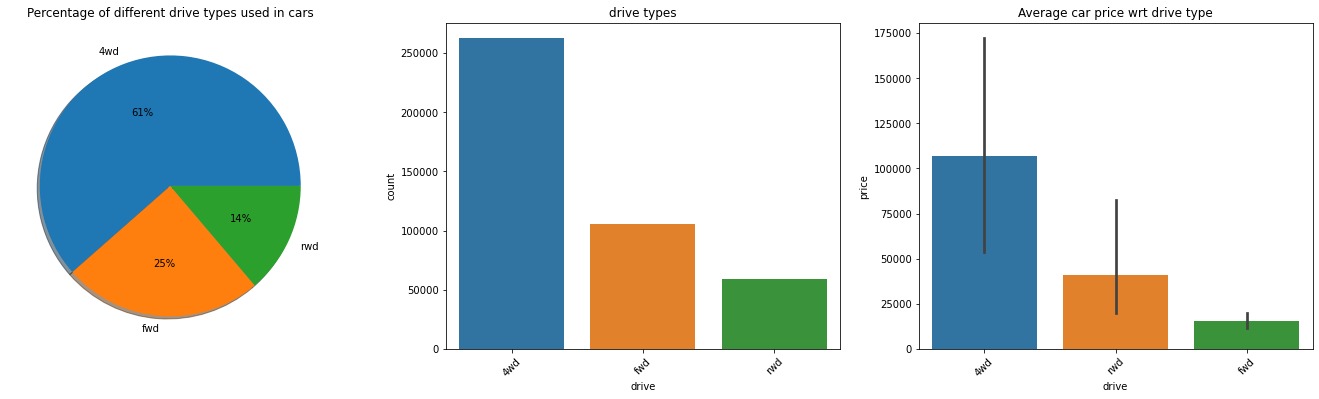

In [34]:
f,ax=plt.subplots(1,3,figsize=(24,6))

#sns.countplot('drive',data=d1,order=d1['drive'].value_counts().index)
ax[0].pie(d1['drive'].value_counts().values,autopct='%1.0f%%',shadow=True,labels=d1['drive'].value_counts().index)
ax[0].set_title('Percentage of different drive types used in cars')

sns.countplot('drive',data=d1,order=d1['drive'].value_counts().index, ax=ax[1])
ax[1].set_title('drive types')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45)

sns.barplot(x='drive', y='price', data=d1, ax=ax[2])
ax[2].set_title('Average car price wrt drive type')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)

plt.show()


### Different type of cars AND Cylinders types ?
*  It is evident from the below graph that SEDAN type Cars are more with 42.1% followed by SUV and bus being least.
* Also,In terms of Cylinders types, 6 cylinders are more in numbers with almost 38.9% and 12 cylinders being the least 

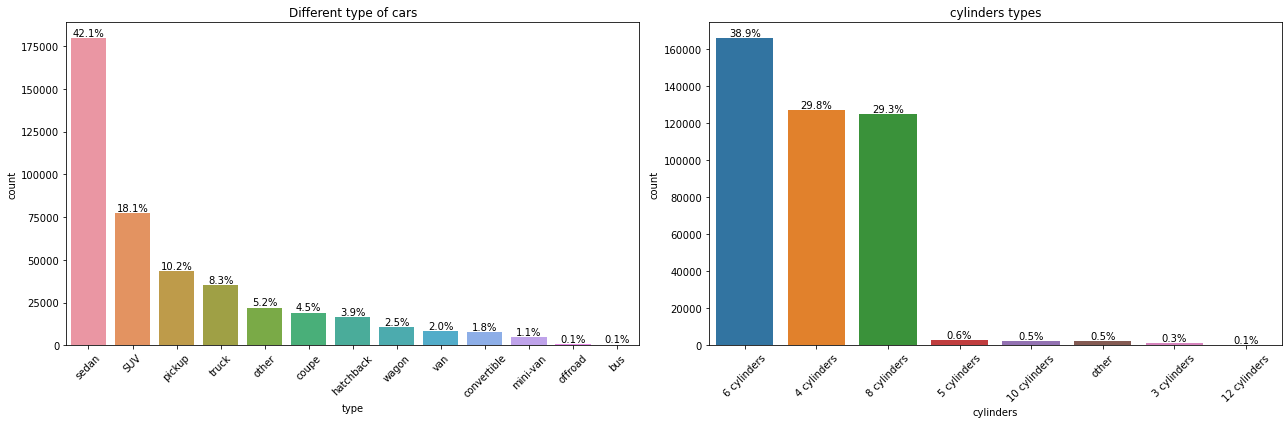

In [35]:
## Different type of cars
f,ax=plt.subplots(1,2,tight_layout=True,figsize=(18,6))

ax1 = sns.countplot('type',data=d1,ax=ax[0], order=d1['type'].value_counts().index)
ax1.set_title('Different type of cars')
ax1.set_xticklabels(ax[0].get_xticklabels(),rotation=45)

## percentage values for each col to first subplot
total = float(len(d1['type']))
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    ax1.annotate(percentage, (p.get_x()+0.4, p.get_height()),
                 ha='center', va='bottom', color='black')

## cylinders
ax2 = sns.countplot('cylinders',data=d1,ax=ax[1], order=d1['cylinders'].value_counts().index)
ax2.set_title('cylinders types')
ax2.set_xticklabels(ax[1].get_xticklabels(),rotation=45)

## percentage values for each col to second subplot
total = float(len(d1['cylinders']))
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    ax2.annotate(percentage, (p.get_x()+0.4, p.get_height()),
                 ha='center', va='bottom', color='black')
    
plt.show()

### Transmission
*  Automatic type is the most popular transmission, with over 79% of used cars. Only a small percentage of used cars are manual type transmission , around 6%.

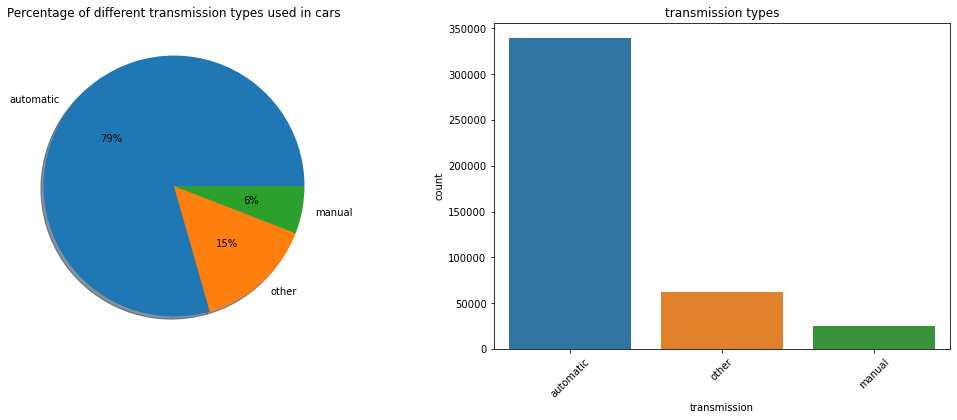

In [36]:
f,ax=plt.subplots(1,2,figsize=(18,6))

ax[0].pie(d1['transmission'].value_counts().values,autopct='%1.0f%%',shadow=True,labels=d1['transmission'].value_counts().index)
ax[0].set_title('Percentage of different transmission types used in cars')

sns.countplot('transmission',data=d1,order=d1['transmission'].value_counts().index)
ax[1].set_title('transmission types')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45)

plt.show()


### Condition
* Majority of the cars listed on the website were listed their cars as Good with over 69% , follwed by excellent and like new.

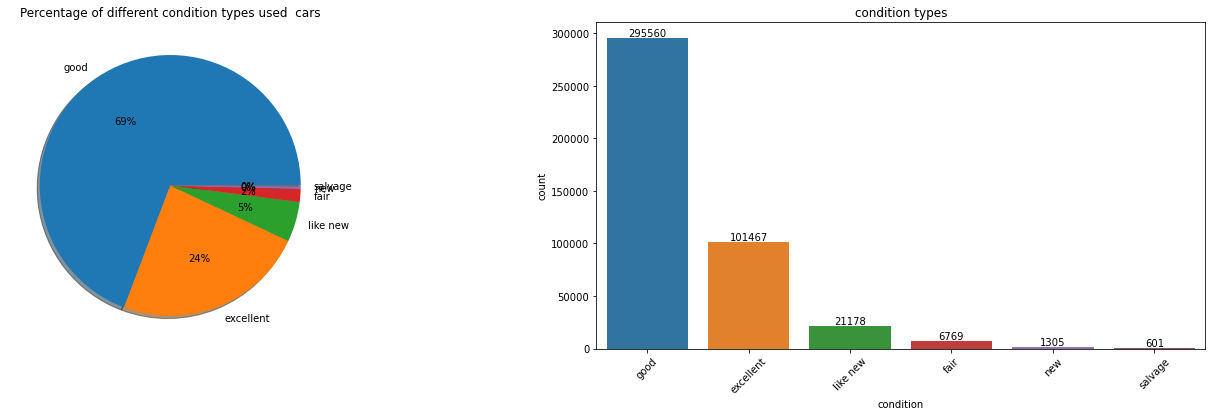

In [37]:
f,ax=plt.subplots(1,2,figsize=(24,6))

ax[0].pie(d1['condition'].value_counts().values,autopct='%1.0f%%',shadow=True,labels=d1['condition'].value_counts().index)
ax[0].set_title('Percentage of different condition types used  cars')

sns.countplot('condition',data=d1,order=d1['condition'].value_counts().index, ax=ax[1])
ax[1].set_title('condition types')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45)

## percentage values for each col to second subplot
for p in ax[1].patches:
    count = p.get_height()
    ax[1].annotate(str(count), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', color='black')

plt.show()

* Co relation between numerical feature

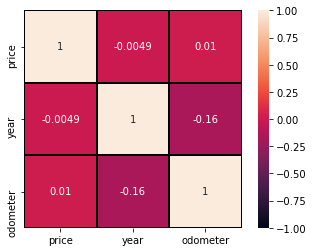

In [38]:
sns.heatmap(d1.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.show()

Scattterplot between Odometer and Price
* If the odometer reading were less, the prices are Increasing and also Good condition cars are in higher demand

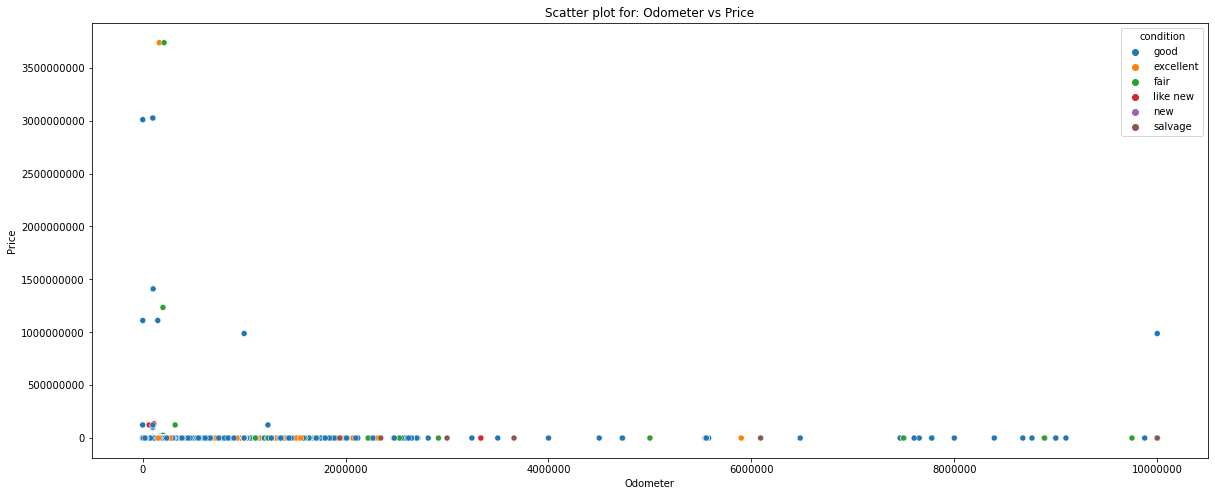

In [39]:
plt.figure(figsize=(20, 8))
## scatter plot
sns.scatterplot(data=d1, x="odometer", y="price", hue='condition')

## format of the tick labels --> To prevent scientifc values such as e
plt.ticklabel_format(style='plain', axis='both')
plt.title('Scatter plot for: Odometer vs Price')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

### PRICE And Odometer
* We can see that there are many outliers presents in the data set of Price and Odometer Column, It will be handled using IQR Techniques. 
* It shows Outliers present Visually.


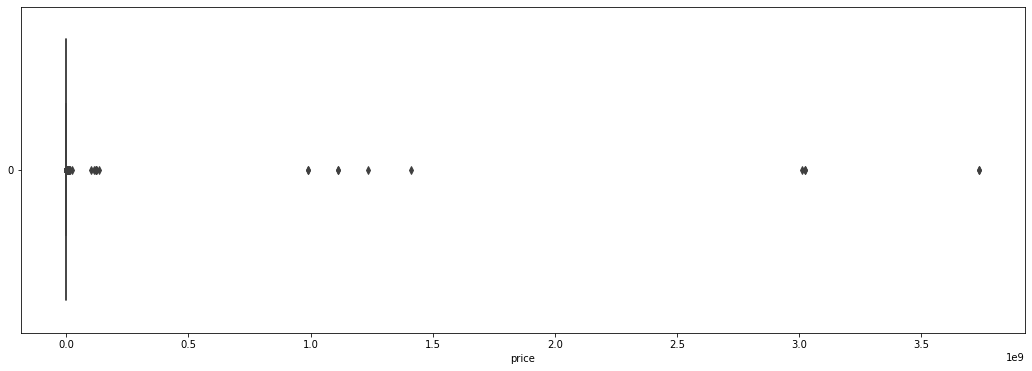

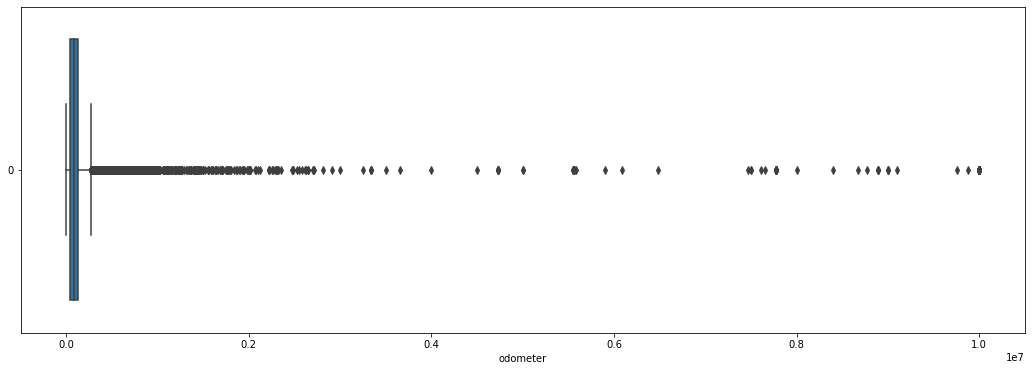

In [40]:
## PRICE
plt.figure(figsize=(18,6))
sns.boxplot(d1['price'])
#plt.ticklabel_format(style='plain', axis='x')
plt.yticks(ticks=plt.yticks()[0], labels=['{:.0f}'.format(x) for x in plt.yticks()[0]])

plt.show()

## odometer
plt.figure(figsize=(18,6))
sns.boxplot(d1['odometer'])
#plt.ticklabel_format(style='plain', axis='x')
plt.yticks(ticks=plt.yticks()[0], labels=['{:.0f}'.format(x) for x in plt.yticks()[0]])

plt.show()

Dropping Rows which Has Price value as = 0 and Odometer reading = 0, It does not make any sense, because we are dealing with used cars

In [41]:
new_d1 = d1[(d1['price'] != 0) & (d1['odometer'] !=0 )]

### Outlier Treatment - IQR

In [42]:
## Outlier Treatement For PRICE 
Q1 = new_d1['price'].describe()['25%']
Q3 = new_d1['price'].describe()['75%']
IQR = Q3-Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

print(Q1)
print(Q3)
print(IQR)
print(LL)
print(UL)

7100.0
27590.0
20490.0
-23635.0
58325.0


In [43]:
## Price Outliers treatment
new_d1_clean = new_d1[(new_d1['price'] > LL )  & (new_d1['price'] < UL)]

In [44]:
## Outlier Treatement For Odometer 
Q1 = new_d1['odometer'].describe()['25%']
Q3 = new_d1['odometer'].describe()['75%']
IQR = Q3-Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

print(Q1)
print(Q3)
print(IQR)
print(LL)
print(UL)

38699.0
135113.0
96414.0
-105922.0
279734.0


In [45]:
## Odometer Outliers treatment
new_d1_clean = new_d1_clean[(new_d1_clean['odometer'] > LL )  & (new_d1_clean['odometer'] < UL)]

In [46]:
new_d1_clean.shape

(381221, 15)

* After treating Outliers

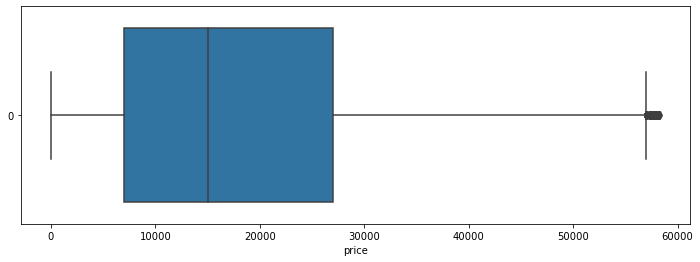

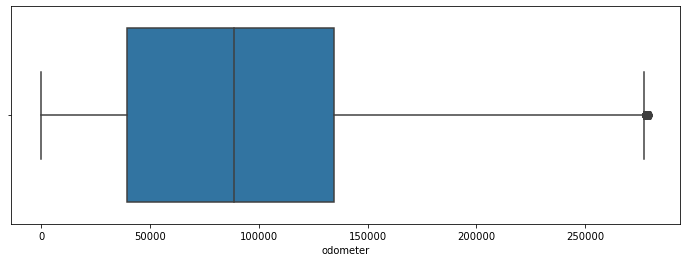

In [47]:
## PRICE -- After treating Outliers
plt.figure(figsize=(12,4))
sns.boxplot(new_d1_clean['price'], orient='h')
plt.yticks(ticks=plt.yticks()[0], labels=['{:.0f}'.format(x) for x in plt.yticks()[0]])
## Odometer -- After treating Outliers
plt.figure(figsize=(12,4))
sns.boxplot(new_d1_clean['odometer'], orient='h')

plt.show()

### Saving Clean Data

In [ ]:
new_d1_clean.to_csv('/content/drive/MyDrive/Datasets/veh_ML.csv', index=False)